In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

In [2]:
#数据点类型（正常或何种异常: 非正常0值数据，标记为“-1”； 超量程数据，标记为“-2”； 偏离正常数据，且非0值非超量程数据，标记为“-3”。)

In [3]:
data = pd.read_csv('./data/dataset.csv')
sub = pd.read_csv('./data/submission.csv')

In [4]:
# 第一步，先做非正常0值

In [5]:
#先把最中午的标出来
#再逐渐扩大白天的范围
#最后再看晚上的
#最最后再看一下其他的异常

In [6]:
data['hour'] = data['Time'].str.split(' ',expand=True)[1].str.split(':',expand=True)[0].astype('int')

In [7]:
data['label'] = 0

In [8]:
data[data['Power'].isin([0])].loc['label']=1

/home/ricardo/anaconda3/envs/boost/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
data[data['Power'].isin([0])]['label']

2130      0
2713      0
2714      0
2715      0
2826      0
         ..
261865    0
261866    0
261867    0
261868    0
261869    0
Name: label, Length: 17495, dtype: int64

In [ ]:
# 第二步，再做超量程数据

In [7]:
#先直接标出每个term,diss,block大于95小于05分位的
power_95 = data['Power'].quantile(0.95)
power_05 = data['Power'].quantile(0.05)

data.loc[data['Power']>power_95]['label']=-2
data.loc[data['Power']<power_05]['label']=-2

In [ ]:
# 第三步，最后去掉非正常0值和超量程数据后做异常检测

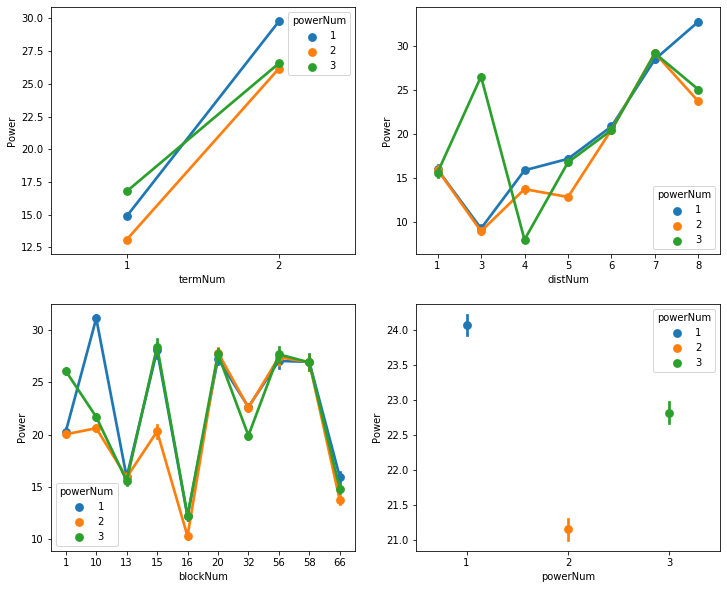

In [8]:
def draw_pointplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(2, 2, figsize=(12, 10))
    count = 0
    for i in [x for x in data.columns if x not in ['Time','Power']]:
        sns.pointplot(x=i, y='Power', data=data, ax=axes[count//2][count%2],hue='powerNum')
        count += 1
        
draw_pointplot(data)

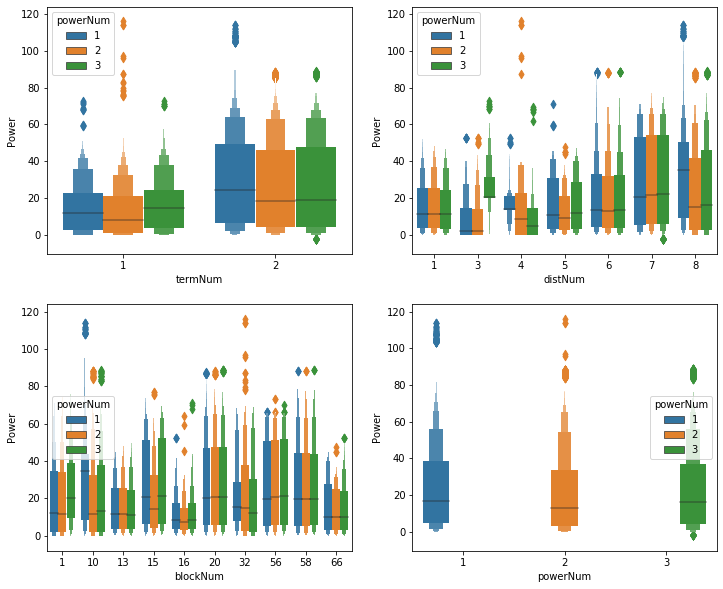

In [74]:
def draw_boxplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(2, 2, figsize=(12, 10))
    count = 0
    for i in [x for x in data.columns if x not in ['Time','Power']]:
        sns.boxenplot(x=i, y='Power', data=data, ax=axes[count//2][count%2],hue='powerNum')
        count += 1
        
draw_boxplot(data)

In [ ]:
data['Power_max'] = data['Power'].rolling(windows=20).max()
data['Power_min'] = data['Power'].rolling(windows=20).min()
data['Power_median'] = data['Power'].rolling(windows=20).median()
data['Power_mean'] = data['Power'].rolling(windows=20).mean()

In [ ]:
for f in tqdm(['termNum','distNum','blockNum']):
    data['power_{}_medi'.format(f)] = data.groupby([f])['Power'].transform('median')
    data['power_{}_mean'.format(f)] = data.groupby([f])['Power'].transform('mean')
    data['power_{}_max'.format(f)] = data.groupby([f])['Power'].transform('max')
    data['power_{}_min'.format(f)] = data.groupby([f])['Power'].transform('min')
    data['power_{}_std'.format(f)] = data.groupby([f])['Power'].transform('std')

In [ ]:
for f in tqdm(['termNum','distNum','blockNum']):
    data[f+'_10_bin'] = pd.cut(data[f], 10, duplicates='drop').apply(lambda x:x.left).astype(int)
    data[f+'_20_bin'] = pd.cut(data[f], 20, duplicates='drop').apply(lambda x:x.left).astype(int)
    data[f+'_40_bin'] = pd.cut(data[f], 40, duplicates='drop').apply(lambda x:x.left).astype(int)
    data[f+'_60_bin'] = pd.cut(data[f], 60, duplicates='drop').apply(lambda x:x.left).astype(int)
    
for f1 in tqdm(['termNum_10_bin','distNum_10_bin','blockNum_10_bin']):
    for f2 in ['Power']
        data['{}_{}_medi'.format(f1,f2)] = data.groupby([f1])[f2].transform('median')
        data['{}_{}_mean'.format(f1,f2)] = data.groupby([f1])[f2].transform('mean')
        data['{}_{}_max'.format(f1,f2)] = data.groupby([f1])[f2].transform('max')
        data['{}_{}_min'.format(f1,f2)] = data.groupby([f1])[f2].transform('min')
        
    
for f1 in tqdm(['termNum_20_bin','distNum_20_bin','blockNum_20_bin']):
    for f2 in ['Power']
        data['{}_{}_medi'.format(f1,f2)] = data.groupby([f1])[f2].transform('median')
        data['{}_{}_mean'.format(f1,f2)] = data.groupby([f1])[f2].transform('mean')
        data['{}_{}_max'.format(f1,f2)] = data.groupby([f1])[f2].transform('max')
        data['{}_{}_min'.format(f1,f2)] = data.groupby([f1])[f2].transform('min')
    
for f1 in tqdm(['termNum_40_bin','distNum_40_bin','blockNum_40_bin']):
    for f2 in ['Power']
        data['{}_{}_medi'.format(f1,f2)] = data.groupby([f1])[f2].transform('median')
        data['{}_{}_mean'.format(f1,f2)] = data.groupby([f1])[f2].transform('mean')
        data['{}_{}_max'.format(f1,f2)] = data.groupby([f1])[f2].transform('max')
        data['{}_{}_min'.format(f1,f2)] = data.groupby([f1])[f2].transform('min')
    
for f1 in tqdm(['termNum_60_bin','distNum_60_bin','blockNum_60_bin']):
    for f2 in ['Power']
        data['{}_{}_medi'.format(f1,f2)] = data.groupby([f1])[f2].transform('median')
        data['{}_{}_mean'.format(f1,f2)] = data.groupby([f1])[f2].transform('mean')
        data['{}_{}_max'.format(f1,f2)] = data.groupby([f1])[f2].transform('max')
        data['{}_{}_min'.format(f1,f2)] = data.groupby([f1])[f2].transform('min')

In [ ]:
model_isof = IsolationForest(n_estimators=100)
outlier_label = model_isof.fit_predict(feature_merge)
outlier_pd = pd.DataFrame(outlier_label, columns=['outlier_label'])

data_merge = pd.concat((df, outlier_pd), axis=1)

In [ ]:
sub['label'] = data_merge['outlier_label']

sub.to_csv('sub.csv',index=None)